In [6]:
import pandas as pd
import numpy as np


Series similar to one column of spreadsheet with column name and row label


In [4]:
s=pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

#### can directly pass Series objects to numpy functions

In [7]:
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Can do arithmetic,elementwise all operations as you do in numpy here

In [8]:
s+[1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [9]:
s+1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [10]:
s<0

0    False
1     True
2    False
3    False
dtype: bool

In [12]:
#can index same as ndarray
s[0]

np.int64(2)

In [14]:
#you can give your own index
s2=pd.Series([68,83,112,68], index=["alice","bob","charles","darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [15]:
#can use series like dict
s2["bob"]

np.int64(83)

Always recommended to use loc and iloc when indexing in pandas

In [16]:
#now you can access either by using index labels or just common number indexing starting from 0
s2.loc["bob"]

np.int64(83)

In [17]:
s2.iloc[1]

np.int64(83)

In [18]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [19]:
#converting dictionary to dataframe
weights={"alice":68,"bob":83,"colin":86,"darwin":68}
s3=pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [20]:
#Control which index you want to include in Series
s4=pd.Series(weights,index={"colin","alice"})


In [23]:
print(s2.keys())
print(s3.keys())
s2+s3  #automatic alignment if label has some matching, see values add


Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [24]:
#init with scalar
meaning = pd.Series(42,["life","universe","everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [25]:

#series can have a name 
s6=pd.Series([83,68],index={"bob","alice"}, name="weights")
s6

alice    83
bob      68
Name: weights, dtype: int64

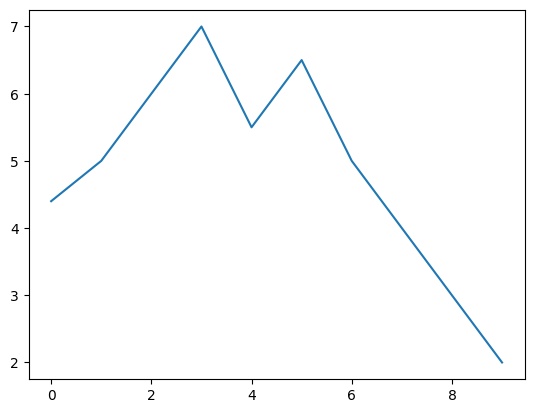

In [26]:
#plotting series
import matplotlib.pyplot as plt 
temperatures = [4.4,5,6,7,5.5,6.5,5,4,3,2]
s7 = pd.Series(temperatures,name="Temperature")
s7.plot()
plt.show()

# Dataframe

In [33]:
#creating dataframe from dictionary
people_dict={
    "weight":pd.Series([68,83,112],index=["alice","bob","charles"]),
    "birthyear":pd.Series([1984,1985,1992],index=["bob","alice","charles"],name="year"),
    "children":pd.Series([0,3],index=["charles","bob"]),
    "hobby":pd.Series(["Biking","Dancing"],index=["alice","bob"]),
}                                                                 
people=pd.DataFrame(people_dict)
people                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [31]:
#calling columns
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [32]:
people[["birthyear","hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [34]:
#choosing specific columns only to make dictionary
d2=pd.DataFrame(people_dict,columns=["birthyear","weight","height"],index=["bob","alice","eugene"])
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [36]:
#making dataframe b passing lists of values, columns and labels separately
values=[
    [1985,np.nan,"Biking",68],
    [1984,3,"Dancing",83],
    [1992,0,np.nan,112]
]
d3=pd.DataFrame(values,
                columns=["birthyear","children","hobby","weight"],
                index=["alice","bob","charles"]
                )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


One can create dataframe with dictionary of dictionary or with list of list. There is also multi level index and column names

## Accessing rows

In [37]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [39]:
#loc to access row by index
people.loc["charles"]

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

In [40]:
#iloc toindex using normal integer index
people.iloc[2]

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

In [41]:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [42]:
#can index using boolean
people[np.array([True, False, True])]  #extracting row 0 and 2


,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


In [43]:
#extracting data wrt some expression which results in boolean value
people[people["birthyear"]<1990]


,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


## Adding and removing columns

In [ ]:
people["age"]=2018-people.loc["birthyear"] #adds new column age
people["over 30"] = people["age"]>30   #add new column people
birthyears=people.pop('birthyear')
del people["children"]


In [50]:
people

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [51]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [53]:
#add column with same number of rows, if less rows, it fills with NaN, more rows are ignored
people["pets"]=pd.Series({"bob":0,"charles":5,"eugne":1})  #adds at end by default
people

,weight,hobby,age,over 30,pets
alice,68,Biking,33,True,NaN
bob,83,Dancing,34,True,0.0
charles,112,NaN,26,False,5.0


In [ ]:
people.insert(1,"height",[172,181,185]) #using insert function, add column at desired column


In [56]:
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


In [57]:
#Creating new dataframe with adding columns
people.assign(
    body_mass_index=people["weight"]/(people["height"]/100)**2,
    has_pets=people["pets"]>0
)

,weight,height,hobby,age,over 30,pets,body_mass_index,has_pets
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


In [58]:
d6=people.assign(body_mass_index=people["weight"]/(people["height"]/100)**2)
d6.assign(overweight=d6["body_mass_index"]>25)

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,True
charles,112,185,NaN,26,False,5.0,32.724617,True


In [59]:
#doing without making dummy variable d6
(people.assign(bmi=lambda df: df["weight"]/(df["height"]/100)**2)
        .assign(ow=lambda df: df["bmi"]>25)

)

,weight,height,hobby,age,over 30,pets,bmi,ow
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,True
charles,112,185,NaN,26,False,5.0,32.724617,True


### Evaluating the expression

In [60]:
people.eval("weight/(height/100)**2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [62]:
#directly modify the dataframe, inplace = True directly modify the dataframe
people.eval("body_mass_index = weight / (height/100) ** 2", inplace = True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index
alice,68,172,Biking,33,True,NaN,22.985398
bob,83,181,Dancing,34,True,0.0,25.335002
charles,112,185,NaN,26,False,5.0,32.724617


In [63]:
#use local variable in expression
ot=30
people.eval("overweight=body_mass_index > @ot",inplace=True)

In [64]:
people

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


### Querying a dataframe

In [65]:
people.query("age > 30 and pets == 0")

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
bob,83,181,Dancing,34,True,0.0,25.335002,False


#### Sorting dataframe

In [66]:
people.sort_index(ascending=False) # by default sorting by rows 

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
charles,112,185,NaN,26,False,5.0,32.724617,True
bob,83,181,Dancing,34,True,0.0,25.335002,False
alice,68,172,Biking,33,True,NaN,22.985398,False


In [67]:
people.sort_index(axis=1, inplace=True) #axis = 1 means by column
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


In [68]:
#can also sort by values of a particular column
people.sort_values(by='age',inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


Plotting


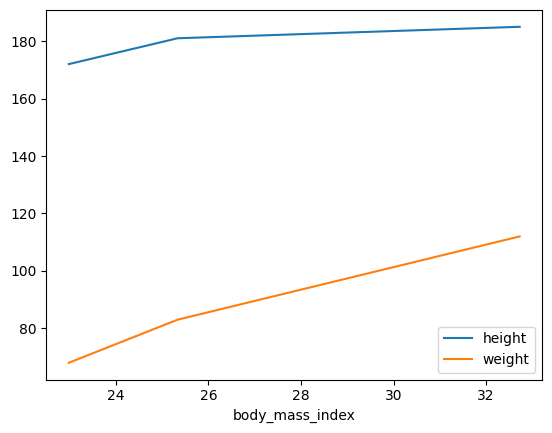

In [69]:
people.sort_values(by="body_mass_index",inplace=True)
people.plot(kind="line",x="body_mass_index",y=["height","weight"])
plt.show()

# Operations on dataframes

most of the times dataframes can be used as numpy arrays

In [70]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [71]:
#you can apply numpy inbuilt functions
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [72]:
grades+1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [74]:
grades>=5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [75]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [76]:
(grades>5).all() #seeing in all values of a particular column

sep    False
oct     True
nov    False
dtype: bool

In [77]:
(grades>5).all(axis=1) #seeing in all values of a particular row

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [78]:
#using any method
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [79]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [80]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [81]:
grades-grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [83]:
#above is equivalent to substracting following dataframe from grades
pd.DataFrame([[7.75,8.75,7.50]]*4,index=grades.index,columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


In [84]:
#substracting global means
grades-grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


### Automatic alignment

In [85]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [86]:
grades+bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [87]:
#handle missing values
(grades+bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [90]:
#just making data look little better
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [91]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [92]:
#we can interpolate along row or column to find NaN, by default it interpolates vertically i.e axis=0
bonus_points.interpolate(axis=1)


,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [93]:
#above can't interpolate 1st value for colin as not feasible so you can fix urself
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [94]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [95]:
#drop NaN rows
final_grades_clean=final_grades.dropna(how="all") #dropping along by default horizontally
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [96]:
final_grades_clean=final_grades_clean.dropna(axis=1,how="all") #dropping along by default vertically
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


### Aggregating with groupby

In [98]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [99]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

In [100]:
grouped_grades.head()

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [101]:
grouped_grades.mean()


,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


In [102]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [ ]:
#pivot tables


## To get info about df

df.head()
df.info()
df.describe()
df.tail()


#### Saving and load

df.to_csv("my_df.csv")
df.to_html("my_df.html")
df.to_jason("my_df.json")

pd.readcsv("my_df.csv")


### Combining dataframes


In [104]:


city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [105]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [106]:
pd.merge(left=city_loc, right=city_pop, on="city") #like inner join only taking common items made new columns

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [107]:
#outer join taking union filling with NaN
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,OH,Cleveland,41.473508,-81.739791,NaN,NaN
1,NaN,Houston,NaN,NaN,2242193.0,Texas
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,NY,New York,40.705649,-74.008344,8363710.0,New-York
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,CA,San Francisco,37.781334,-122.416728,808976.0,California


### Concat and categoerical data handling as and when required